In [1]:
import pandas as pd
filepath = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/12%EC%A3%BC%EC%B0%A8/data/data1.tsv'

In [2]:
data = pd.read_csv(filepath,sep='\t')
data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [3]:
print(data.shape)
print("-"*100)
print(data.info())

(4622, 5)
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [4]:
print(data.columns)
print("-"*100)
print(data.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
----------------------------------------------------------------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


id는 숫자의 의미를 가지지 않기 때문에 str로 변환합니다.

In [6]:
data['order_id'] = data['order_id'].astype(str)
# 요약통계  수치형 데이터들의 요약 통계량을 확인
print(data.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


범주형피처는 unique함수로 개수 파악

In [10]:
len(data['order_id'].unique()),  len(data['item_name'].unique())

(1834, 50)

가장많이 주문한 item - top10

item당 주문의 총량

In [19]:
item_count = data['item_name'].value_counts()[:10]
for idx,  (name,cnt) in  enumerate( item_count.items()):
  print(f"Top{idx+1} : {name}  {cnt}")

Top1 : Chicken Bowl  726
Top2 : Chicken Burrito  553
Top3 : Chips and Guacamole  479
Top4 : Steak Burrito  368
Top5 : Canned Soft Drink  301
Top6 : Steak Bowl  211
Top7 : Chips  211
Top8 : Bottled Water  162
Top9 : Chicken Soft Tacos  115
Top10 : Chips and Fresh Tomato Salsa  110


item당 주문 개수와 총량

In [28]:
#item당 주문의 개수
order_count = data.groupby('item_name')['order_id'].count()
order_count[:5]

item_name
6 Pack Soft Drink        54
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    11
Barbacoa Salad Bowl      10
Name: order_id, dtype: int64

In [29]:
#item당 주문의 총량
item_quantity = data.groupby('item_name')['quantity'].count()
item_quantity[:5]

item_name
6 Pack Soft Drink        54
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    11
Barbacoa Salad Bowl      10
Name: quantity, dtype: int64

현재까지의 데이터를 가지고 시각화

In [30]:
import numpy as np
import matplotlib.pyplot as plt

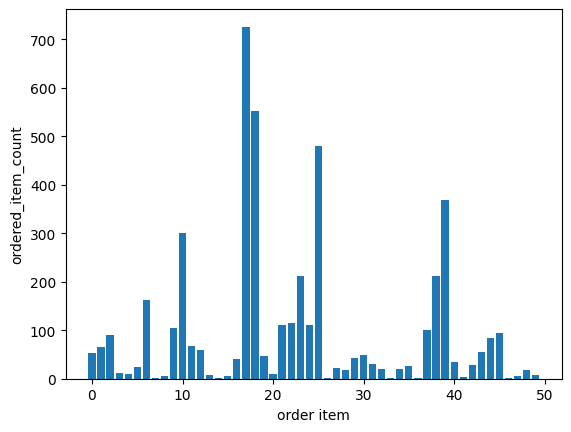

In [34]:
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_count, align='center')
plt.ylabel('ordered_item_count')
plt.xlabel('order item')
plt.show()

데이터 전처리
  - apply, labmda

In [35]:
data.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [36]:
data['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [38]:
data['item_price'] = data['item_price'].apply(lambda x: float(x[1:]))
data.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


주문당 평균 계산금액 출력